In [1]:
%load_ext autoreload
%autoreload 2

import os

import copy

import numpy as np
import matplotlib.pyplot as plt

from astropy import wcs
from astropy.io import fits
from astropy.table import Table, Column, hstack

from mrf.display import display_single, SEG_CMAP

plt.rcParams['text.usetex'] = True

In [2]:
from mrf.task import MrfTask

### Implement `mrf` task by providing directories of input images, along with galaxies you want to retain during `mrf`.

In [3]:
task = MrfTask('m101-df3-task.yaml')
img_lowres = 'M101_DF3_df_r.fits'
img_hires_b = 'M101_DF3_cfht_r.fits'
img_hires_r = 'M101_DF3_cfht_r.fits'
certain_gal_cat = 'gal_cat_m101.txt'
results = task.run(img_lowres, img_hires_b, img_hires_r, certain_gal_cat, 
                   output_name='m101_df3', verbose=True)

2019-08-15 16:51:55,397 Running Multi-Resolution Filtering (MRF) on "cfht" and "df" images!
2019-08-15 16:51:55,419 Magnify Dragonfly image with a factor of 3.0:
2019-08-15 16:51:55,632 Register high resolution image "M101_DF3_cfht_r.fits" with "M101_DF3_df_r.fits"
2019-08-15 16:51:56,949 Register high resolution image "M101_DF3_cfht_r.fits" with "M101_DF3_df_r.fits"
2019-08-15 16:51:58,120 Build flux models on high-resolution images: Blue band
2019-08-15 16:51:58,121     - sigma = 2.5, minarea = 2
2019-08-15 16:51:58,122     - deblend_cont = 0.00500, deblend_nthres = 32.0
2019-08-15 16:51:58,631     - Detect 8634 objects
2019-08-15 16:52:01,146 Build flux models on high-resolution images: Red band
2019-08-15 16:52:01,146     - sigma = 2.5, minarea = 2
2019-08-15 16:52:01,147     - deblend_cont = 0.00500, deblend_nthres = 32.0
2019-08-15 16:52:01,745     - Detect 8634 objects
2019-08-15 16:52:04,388 Make color correction to blue band, remove artifacts as well
2019-08-15 16:52:04,449   

### The results are stored in `results`. You can simply show the `mrf` results as follows. 

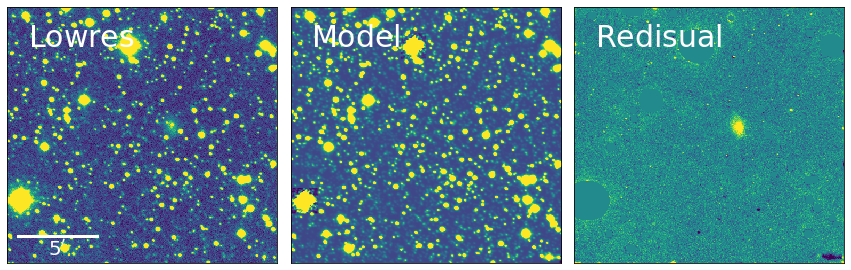

In [6]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(15, 8))
ax1 = display_single(results.lowres_input.image, ax=ax1, pixel_scale=2.0, 
                     scale_bar_length=300, scale_bar_y_offset=0.3, add_text='Lowres')
ax2 = display_single(results.lowres_model.image, ax=ax2, scale_bar=False, add_text='Model')
ax3 = display_single(results.lowres_final.image, ax=ax3, scale_bar=False, add_text='Redisual')

plt.subplots_adjust(wspace=0.05)
plt.savefig('m101-df3-demo.png', bbox_inches='tight', facecolor='silver')

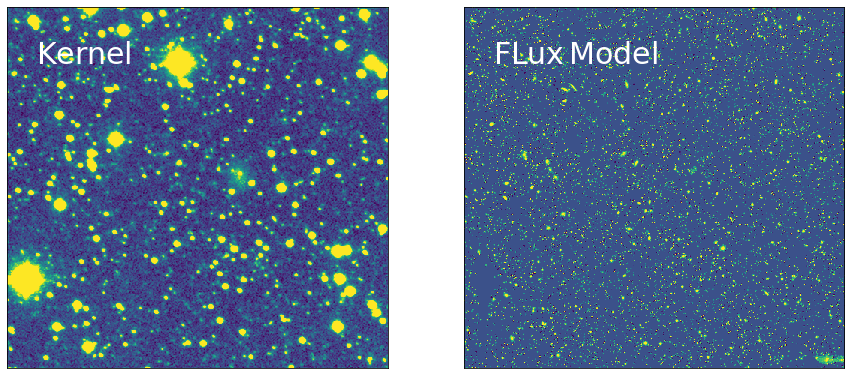

In [5]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 8))
ax1 = display_single(results.lowres_input.image, ax=ax1, 
                     scale_bar=False, add_text='Kernel')
ax2 = display_single(results.hires_fluxmod, ax=ax2, scale='percentile', lower_percentile=0.5,
                     scale_bar=False, add_text='FLux\,Model')

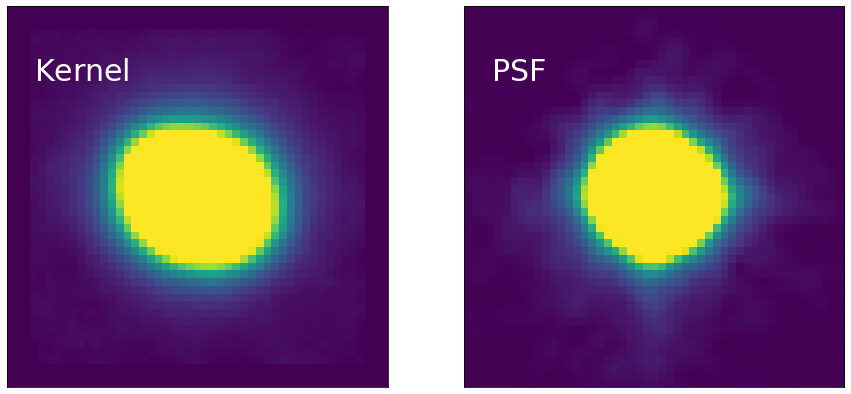

In [14]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 8))
ax1 = display_single(results.kernel_med, ax=ax1, 
                     scale_bar=False, add_text='Kernel')
ax2 = display_single(results.PSF, ax=ax2, 
                     scale_bar=False, add_text='PSF')